# Alzeimer Detection 

# Content:
<br>
1.Abstract
<br>
2.Explainations of analysis and interpretations 
<br>
3.Conclusions
<br>
4.Contribution Statement
<br>
5.Citations
<br>
6.License

# Abstract

Let's understand what is the Alzeimers Disease first: 
<br>
Alzheimer's disease (AD) is a neurodegenerative disorder of uncertain cause and pathogenesis that primarily affects older adults and is the most common cause of dementia.The earliest clinical manifestation of AD is selective memory impairment and while treatments are available to ameliorate some symptoms, there is no cure currently available.
<br>
Brain Imaging via magnetic resonance imaging (MRI), is used for evaluation of patients with suspected AD.However in order to reach that stage clinicians and researchers will have to make use of machine learning techniques that can accurately predict progress of a patient from mild cognitive impairment to dementia. During this reaserch project, I am trying build models using different machine learning techniques and at the end to compare which performs the best.

# Explainations of analysis and interpretations 

It is better to get to know the data first before starting any analysis:
<br>
#### Data
<br>
The data is taken from the Open Access Series of Imaging Studies (OASIS) project that is available both, on their website and kaggle that can be utilized for the purpose of training various machine learning models to identify patients with mild to moderate dementia.
<br>
<br>
Content in the data:
<br>
We will be using the longitudinal MRI data.
<br>
The dataset consists of a longitudinal MRI data of 150 subjects aged 60 to 96.
<br>
Each subject was scanned at least once.
<br>
Everyone is right-handed.
<br>
72 of the subjects were grouped as 'Nondemented' throughout the study.
<br>
64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.
<br>
14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. These fall under the 'Converted' category.

#### Column description
<br>
COL = FULL-FORMS
<br>
EDUC = Years of education
<br>
SES = Socioeconomic Status
<br>
MMSE = Mini Mental State Examination
<br>
CDR = Clinical Dementia Rating
<br>
eTIV = Estimated Total Intracranial Volume
<br>
nWBV = Normalize Whole Brain Volume
<br>
ASF = Atlas Scaling Factor

Let us understand the machine learning techniques used to generate the models:
<br>
<br>
<br>
1)SVM(Support Vector Machine):A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
<br>
<br>
2)K-Means Clustering:K-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space.
<br>
<br>
3)KNN(K Nearest Neighbours):K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 
<br>
<br>
4)Naive Bayes:A naive Bayes classifier is an algorithm that uses Bayes' theorem to classify objects. Naive Bayes classifiers assume strong, or naive, independence between attributes of data points. Popular uses of naive Bayes classifiers include spam filters, text analysis and medical diagnosis. These classifiers are widely used for machine learning because they are simple to implement.
<br>
<br>
5)Decision Tree Classifier:A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.
<br>
<br>
6)Random Forest Classifier:Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cluster
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc, classification_report
from sklearn import datasets 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB

import warnings #used to ignore all errors
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
# Importing the dataset
df = pd.read_csv('oasis_longitudinal.csv')

In [3]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


As we can see in the above table that there are a lot of values which are kin string, we have to convert those in the binary form.Since there are binary classification on column 'Group' it will be our target variable.

In [4]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data

Replacing the the unwanted values in proper format and droping the columns which have string values.

In [5]:
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [6]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

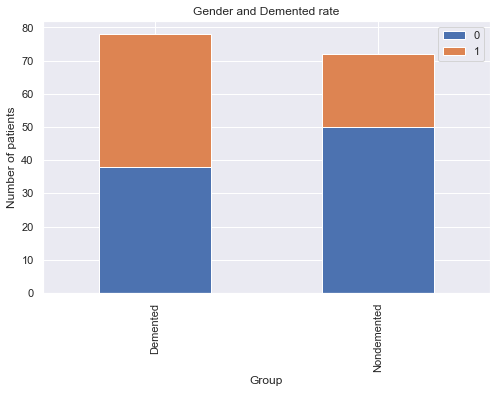

In [7]:
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

From the above graph we can see that there are almost equal numbers of demented men and women.On the other side we can see that, the number of nondemented females are really low compared to men.This shows that men are more likely suffer from dementia than women.   

(15.3, 30.0)

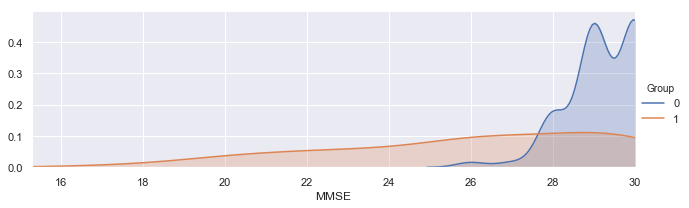

In [8]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. 
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

The above is graphical comparison of the Mini Mental Status Exam(MMSE) which has the maximum score of 30. The above graph shows the Nondemented group got much more higher MMSE scores than Demented group.   

(0.6, 0.9)

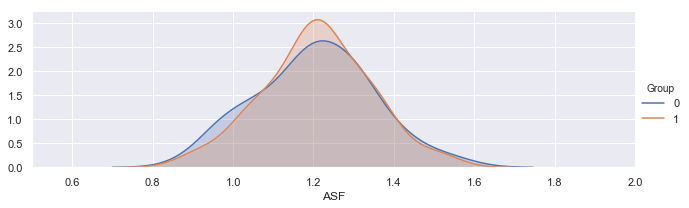

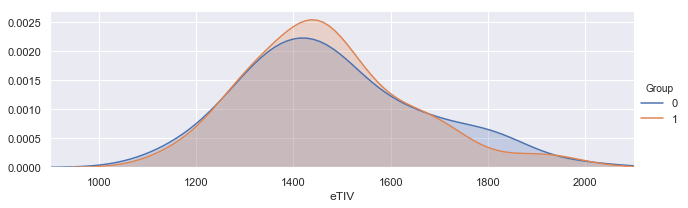

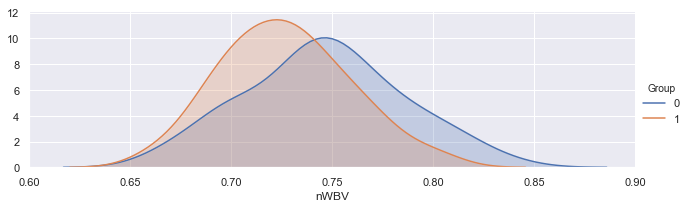

In [9]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

The above sets of chart shows that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.

(50, 100)

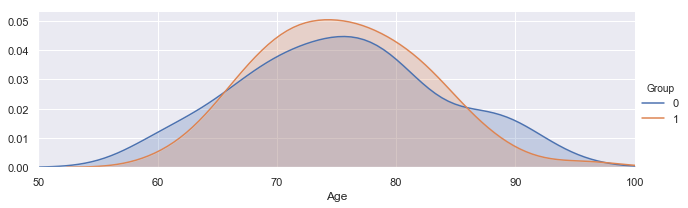

In [10]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(0, 0.16)

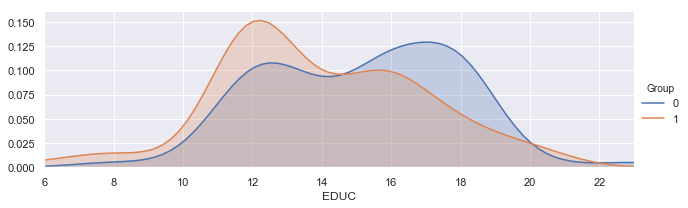

In [11]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

#### Result from graphs
<br>
<br>
1)Men are more likely with demented, an Alzheimer's Disease, than Women.
<br>
2)Demented patients were less educated in terms of years of education.
<br>
3)Nondemented group has higher brain volume than Demented group.
<br>
4)Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.

## Data Processing

After careful analysis we have identified 8 rows with missing values in SES column.Since the data have only 150 data we will replace the values with corresponding values,also known as 'Imputation'.

In [12]:
# Check missing values by each column
pd.isnull(df).sum() 
# The column, SES has 8 missing values

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

### Removing rows with null values

Removing rows which have a lot of null values so they won't create hinderance in our research.

In [13]:
# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [14]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

# Imputation

Scikit-learn provides package for imputation, but I will be focus on the manual method. Since the SES is a discrete variable, we use median for the imputation.

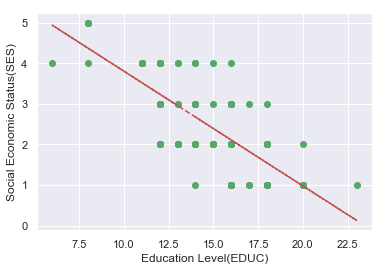

In [15]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [16]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [17]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [18]:
# I confirm there're no more missing values and all the 150 data were used.
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

Since there are no nulls left and the data is all clean we can start with the analysis further.

## Spliting into train and test

Let's select the rows of the dataset first

In [19]:
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

In [20]:
# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)

In [21]:
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

Let's select the dataset which do not contain the mission values 

In [22]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

In [23]:
# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

In [24]:
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

# Models

In case of medical diagnostics for non-life threatening terminal diseases like most neurodegenerative diseases it is important to have a high true positive rate so that all patients with alzheimer's are identified as early as possible. But I also want to make sure that the false positive rate is as low as possible since I do not want to misdiagnose a healthy adult as demented and begin medical therapy. Hence AUC seemed like a ideal choice for a performance measure.We will also be looking at accuracy and recall for each model.Let's get familiar with some terms:
<br>
Precision:How many selected items are relevennt?
<br>
Recall:How many relevent items are selected?

# SVM

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
<br>
<br>
Gamma:The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation.
<br>
<br>
Kernel:The learning of the hyperplane in linear SVM is done by transforming the problem using some linear algebra. This is where the kernel plays role.
<br>
<br>
Margin:SVM to core tries to achieve a good margin.A margin is a separation of line to the closest class points.
A good margin is one where this separation is larger for both the classes. Images below gives to visual example of good and bad margin. A good margin allows the points to be in their respective classes without crossing to other class.

C: Penalty parameter C of the error term. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

gamma: kernel coefficient. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

kernel: kernel type. ['rbf', 'linear', 'poly', 'sigmoid']

In [25]:
best_score = 0
kfolds=5

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            

In [26]:
# rebuild a model with best parameters to get score 
acc = []
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.7715038584603802
Best parameter for c is:  100
Best parameter for gamma is:  0.1
Best parameter for kernel is:  rbf
Test accuracy with the best parameters is 0.8157894736842105
Test recall with the best parameters is 0.7
Test recall with the best parameter is 0.8222222222222222


Here we can see the accuracy is 81 percentage which was obtained by the cross validation.

# Decision Tree

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.
<br>
A decision tree consists of three types of nodes:
<br>
Decision nodes – typically represented by squares
<br>
Chance nodes – typically represented by circles
<br>
End nodes – typically represented by triangles

Maximum depth. [1, 2, ..., 8]

8 is the number of features

In [27]:
best_score = 0

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

In [28]:
# Rebuild a model on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7785431959345004
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.8157894736842105
Test recall with best parameters is  0.65
Test AUC with the best parameter is  0.825


In [29]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U4')

Here we can see that the accuracy is around 81.57 percentage.

## Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.

n_estimators(M): the number of trees in the forest

max_features(d): the number of features to consider when looking for the best split

max_depth(m): the maximum depth of the tree.

In [31]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m


In [32]:
# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7967250141163185
Best parameters of M, d, m are:  6 5 7
Test accuracy with the best parameters is 0.868421052631579
Test recall with the best parameters is: 0.8
Test AUC with the best parameters is: 0.8722222222222222


The acuracy of the above model is 86.84% from the cross validation method.

## K-Means Clustering

K-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space.
<br>
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids.
It halts creating and optimizing clusters when either:
<br>
The centroids have stabilized — there is no change in their values because the clustering has been successful.
<br>
The defined number of iterations has been achieved.

## Building and running your model

In [33]:
df.drop('Subject ID',axis=1,inplace=True) 
x = scale(df)
y= pd.DataFrame(df)
variable_names = df.Group

In [34]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

## Plotting your model outputs

In [35]:
df.info

<bound method DataFrame.info of      Group  MR Delay  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0        0         0    1   87    14  2.0  27.0  0.0  1987  0.696  0.883
1        1         0    1   75    12  3.0  23.0  0.5  1678  0.736  1.046
2        0         0    0   88    18  3.0  28.0  0.0  1215  0.710  1.444
3        0         0    1   80    12  4.0  28.0  0.0  1689  0.712  1.039
4        1         0    1   71    16  2.0  28.0  0.5  1357  0.748  1.293
..     ...       ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
145      1         0    1   73    12  3.0  23.0  0.5  1661  0.698  1.056
146      0         0    0   66    13  2.0  30.0  0.0  1495  0.746  1.174
147      1         0    0   72    16  3.0  24.0  0.5  1354  0.733  1.296
148      1         0    1   80    16  1.0  28.0  0.5  1704  0.711  1.030
149      0         0    0   61    13  2.0  30.0  0.0  1319  0.801  1.331

[150 rows x 11 columns]>

In [36]:
df = pd.DataFrame(df)
alzeimer_df=['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'] #Selecting columns
y=df['Group'] #Target
print(df)

     Group  MR Delay  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0        0         0    1   87    14  2.0  27.0  0.0  1987  0.696  0.883
1        1         0    1   75    12  3.0  23.0  0.5  1678  0.736  1.046
2        0         0    0   88    18  3.0  28.0  0.0  1215  0.710  1.444
3        0         0    1   80    12  4.0  28.0  0.0  1689  0.712  1.039
4        1         0    1   71    16  2.0  28.0  0.5  1357  0.748  1.293
..     ...       ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
145      1         0    1   73    12  3.0  23.0  0.5  1661  0.698  1.056
146      0         0    0   66    13  2.0  30.0  0.0  1495  0.746  1.174
147      1         0    0   72    16  3.0  24.0  0.5  1354  0.733  1.296
148      1         0    1   80    16  1.0  28.0  0.5  1704  0.711  1.030
149      0         0    0   61    13  2.0  30.0  0.0  1319  0.801  1.331

[150 rows x 11 columns]


Text(0.5, 1.0, 'K-Means Classification')

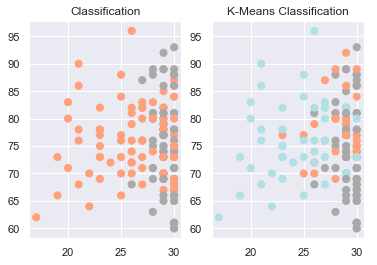

In [37]:
color_theme= np.array(['darkgray','lightsalmon','powderblue']) #Deciding colurs 

plt.subplot(1,2,1)
plt.scatter(x=df.MMSE,y=df.Age,c=color_theme[df.Group.values],s=50)
plt.title('Classification')

plt.subplot(1,2,2)
plt.scatter(x=df.MMSE,y=df.Age,c=color_theme[clustering.labels_],s=50)
#plt.scatter(x=df[4],y=alzeimer_df[1],s=50)
plt.title('K-Means Classification')

From above visualization we can see that the clusters are formed and data is properly sagrigated b ut the labels are interchanged so we have to change the labels.

Text(0.5, 1.0, 'K-Means Classification')

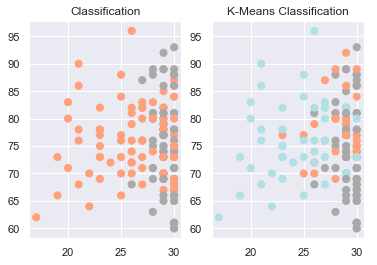

In [38]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=df.MMSE,y=df.Age,c=color_theme[df.Group.values],s=50)
#plt.scatter(x=alzeimer_df[4],y=alzeimer_df[1],s=50)
plt.title('Classification')

plt.subplot(1,2,2)
plt.scatter(x=df.MMSE,y=df.Age,c=color_theme[clustering.labels_],s=50)
#plt.scatter(x=df[4],y=alzeimer_df[1],s=50)
plt.title('K-Means Classification')

In [39]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       0.59      0.28      0.38        72
           1       1.00      0.64      0.78        78
           2       0.00      0.00      0.00         0

    accuracy                           0.47       150
   macro avg       0.53      0.31      0.39       150
weighted avg       0.80      0.47      0.59       150



From above we can see the the precision,recall,f1-score and support.

## KNN Method

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor.
<br>
KNN Algorithm is based on feature similarity: How closely out-of-sample features

In [40]:
df.colomns = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'] #Deciding the columns
X_Prime= df[['EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y=df['Group'] #Target

In [41]:
X= preprocessing.scale(X_Prime)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Building and training the model

In [43]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


## Evaluating model's predictions against the test dataset

In [45]:
y_expect = y_test
y_pred = clf.predict(X_test)

In [46]:
print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.76      0.67        21
           1       0.78      0.62      0.69        29

    accuracy                           0.68        50
   macro avg       0.69      0.69      0.68        50
weighted avg       0.70      0.68      0.68        50



In the above observations we can see the precision,recall,f1-score and support

## Naive Bayes 

A naive Bayes classifier is an algorithm that uses Bayes' theorem to classify objects. Naive Bayes classifiers assume strong, or naive, independence between attributes of data points. Popular uses of naive Bayes classifiers include spam filters, text analysis and medical diagnosis. These classifiers are widely used for machine learning because they are simple to implement. 

In [47]:
df.colomns = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
X_Prime= df[['EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] #Deciding coloumns 
y=df['Group'] #Target

Splitting into training and testing 

In [48]:
X= preprocessing.scale(X_Prime)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [50]:
num_ex = df.shape[0]
num_features = df.shape[1]

In [51]:
m_train = int(num_ex*0.70)
m_test = num_ex - m_train
print('# of training examples:', m_train, '\n# of test examples:', m_test)

# of training examples: 105 
# of test examples: 45


## Applying on test data

In [52]:
clf_nb = BernoulliNB()
clf_nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [53]:
clf_nb_predictions = clf_nb.predict(X_test)
nb_accuracy = (clf_nb_predictions == y_test)

In [54]:
print('Test Accuracy:', format(np.sum(nb_accuracy)/m_test, '.2%'))

Test Accuracy: 91.11%


Naive Bayes has the highest accuracy till now. Let us see the analysis in detail for the each model we have produced.

# Conclusion 

After going through the all of the analysis we get to see the accuracy or precision of differnt models. The accuracy is as followed:
<br>
SVM = 81.5%
<br>
Decision Tree = 81.57%
<br>
Reandom Forest = 86.84%
<br>
K-Means Cluster = 80.00%
<br>
Naive Bayes = 91.11%
<br>
Hence we can conclude that the Naive Bayes model is the best model for this data set. It it very simple and efficient comapred to all other models.

# Contribution

The structural analysis of the assignment and creating a few models after studying them.Elemenating the errors and cleaning the data.Contribution : around 50 percentage and 50 percentage reference.

# Citations

1. The reference dataset was from the OASIS open dataset website x and used for the analysis is https://www.kaggle.com/vaibhavmathur96/detecting-early-alzheimer-s.
2. All these data sets are made up of data from the US government. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html 
3. https://docs.anaconda.com/anaconda/packages/pkg-docs/ - Used for python pacakges.
4. Google was used for understanding the graphs and explaination-www.google.com
5. Udemy and Edureka videos are referred for better understanding
6. Github
7. K-Means reference: https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python
8. KNN reference: https://www.youtube.com/watch?v=s-9Qqpv2hTY
9. Naive Bayes reference: https://www.youtube.com/watch?v=99MN-rl8jGY
10. https://en.wikipedia.org/wiki/Precision_and_recall
11. http://scikit-learn.org/stable/modules/preprocessing.html#imputation

# License
( https://opensource.org/licenses/MIT) 
Copyright <2019> CHINMAY A AROLKAR

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.